# ASPTest Script

We will test our Online Bayesian Detector customized for detection of the presence of a stochastic process.

# Load data

Text(0.5, 1.0, 'Lateral trajectories')

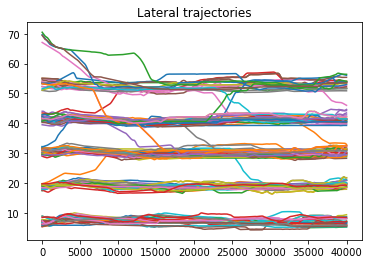

In [22]:
import pickle
import numpy as np
from matplotlib import pyplot as plt 

pfile = pickle.load(open( "lane.pyo", "rb" ))
tvec = pfile['t_vec'][0]
xvec = pfile['x_vec']

for i in range(xvec.shape[0]):
    plt.plot(tvec, xvec[i,:])

plt.title('Lateral trajectories')

# Load FPCA

In [27]:
import pickle
fpca_discretized = pickle.load(open('fpca.pyo', 'rb'))
basis = fpca_discretized.components_.data_matrix.reshape((-1,fpca_discretized.components_.data_matrix.shape[1])).transpose()
basis = basis[:,:2]
mean = fpca_discretized.mean_.data_matrix.reshape((-1,1))

Text(0.5, 1.0, 'Mean')

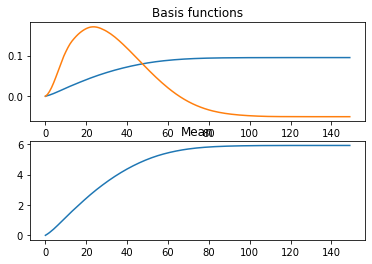

In [28]:
plt.subplot(2,1,1)
plt.plot(basis)
plt.title('Basis functions')
plt.subplot(2,1,2)
plt.plot(mean)
plt.title('Mean')

# Get a sample trajectory

In [33]:
lcdts = pickle.load(open('lcsp.pyo','rb'))

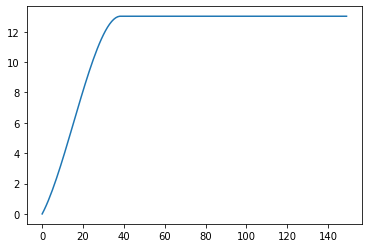

In [39]:
# sample_traj = xvec[16,:]
sample_traj = lcdts[0]
# sample_traj = xvec[16,:]
plt.plot(sample_traj)

# Load up the detector

In [30]:
from ASPDetector import ASPDetector

In [32]:
asp = ASPDetector(
    np.array([[0],[0]]),
    np.array([[30,0],[0,15]]),
    1e-2,
    mean,
    basis,
    75
)

Initialization of ASPDetector completed


In [40]:
for t in range(100):
    asp.add_datum(t)

 /Users/thinhhoang/Documents/anomaly-detection-ngsim/lanechange/ASPDetector.py:43: RuntimeWarning:divide by zero encountered in double_scalars


ValueError: operands could not be broadcast together with shapes (2,2) (150,150) 